<a href="https://colab.research.google.com/github/varenyaa/heartdiseaseprediction_AIprototype/blob/main/Heartdisease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Step 1: Load the dataset
df = pd.read_csv("/content/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

In [ ]:
# Step 1: Load the dataset
df = pd.read_csv("/content/heart.csv")

In [ ]:
display(df.describe())
display(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

In [ ]:
ax= px.pie(df, names= "sex",template= "plotly_dark",title= "Gender distribution",hole= 0.5)
ax.show()

In [ ]:
X=df[df["sex"]==1].reset_index()
Y=df[df["sex"]==0].reset_index()
display(X.head(),Y.head())

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
1,5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
2,10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
3,11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
4,12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


In [ ]:
fig=go.Figure()
fig.add_trace(go.Box(y=Y["age"],name="Male",marker_color="blue",boxpoints="all",whiskerwidth=0.3))
fig.add_trace(go.Box(y=X["age"],name="Female",marker_color="#e75480",boxpoints="all",whiskerwidth=0.3))
fig.update_layout(template="plotly_dark",title="Age Distribution",height=600)
fig.show()

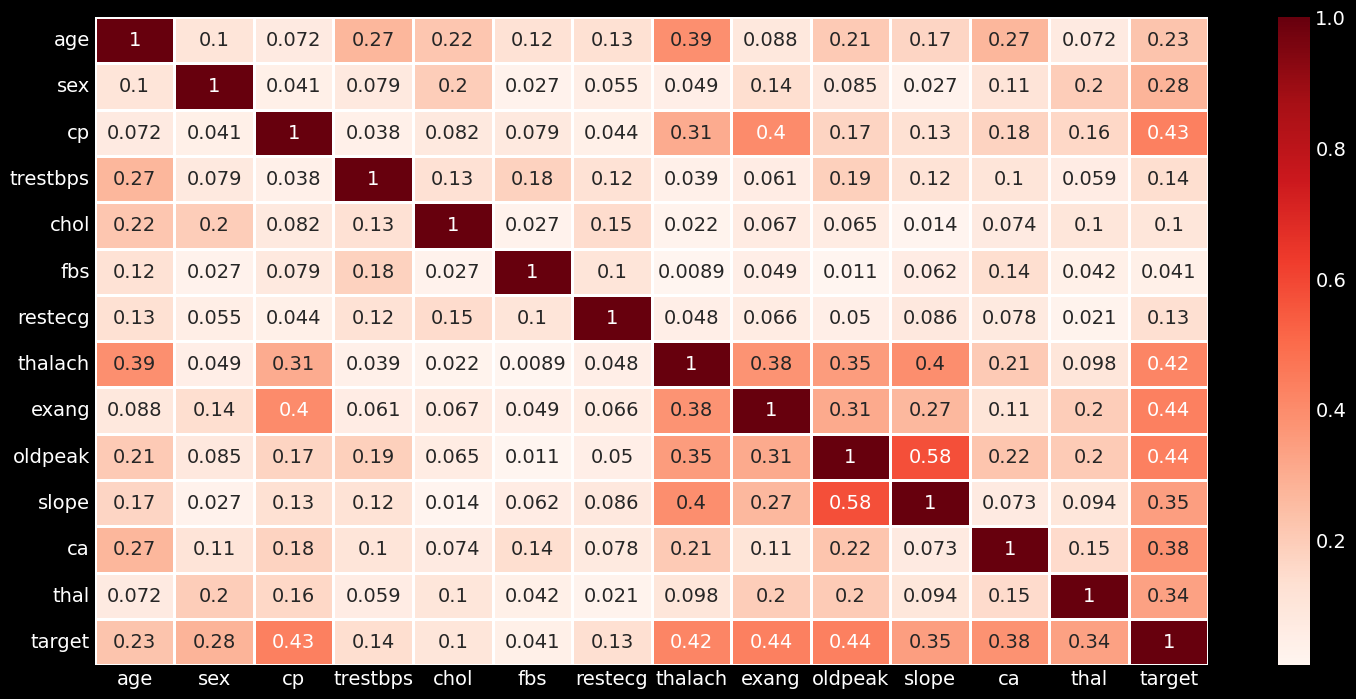

oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


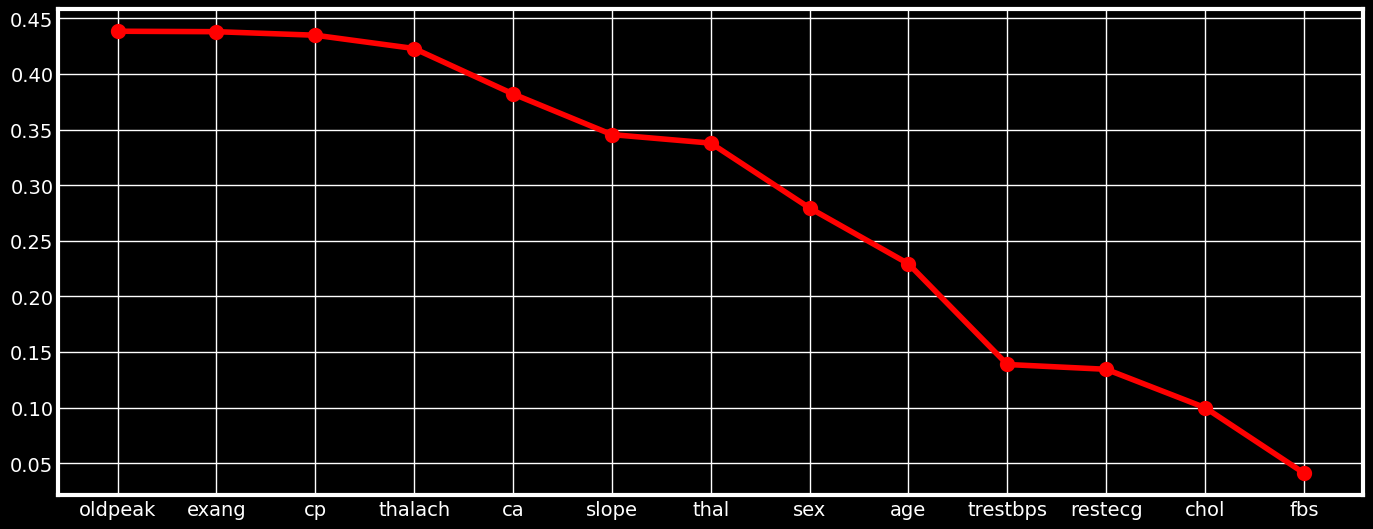

In [ ]:
new_data1=df
plt.figure(figsize=(16,8))
corr=new_data1.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["target"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

In [ ]:
continuous_cols=["age","trestbps","chol","thalach","oldpeak"]
continuous_data=df[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trestbps outliers = 45 => 4.39%
Column chol outliers = 16 => 1.561%
Column thalach outliers = 4 => 0.39%
Column oldpeak outliers = 7 => 0.683%


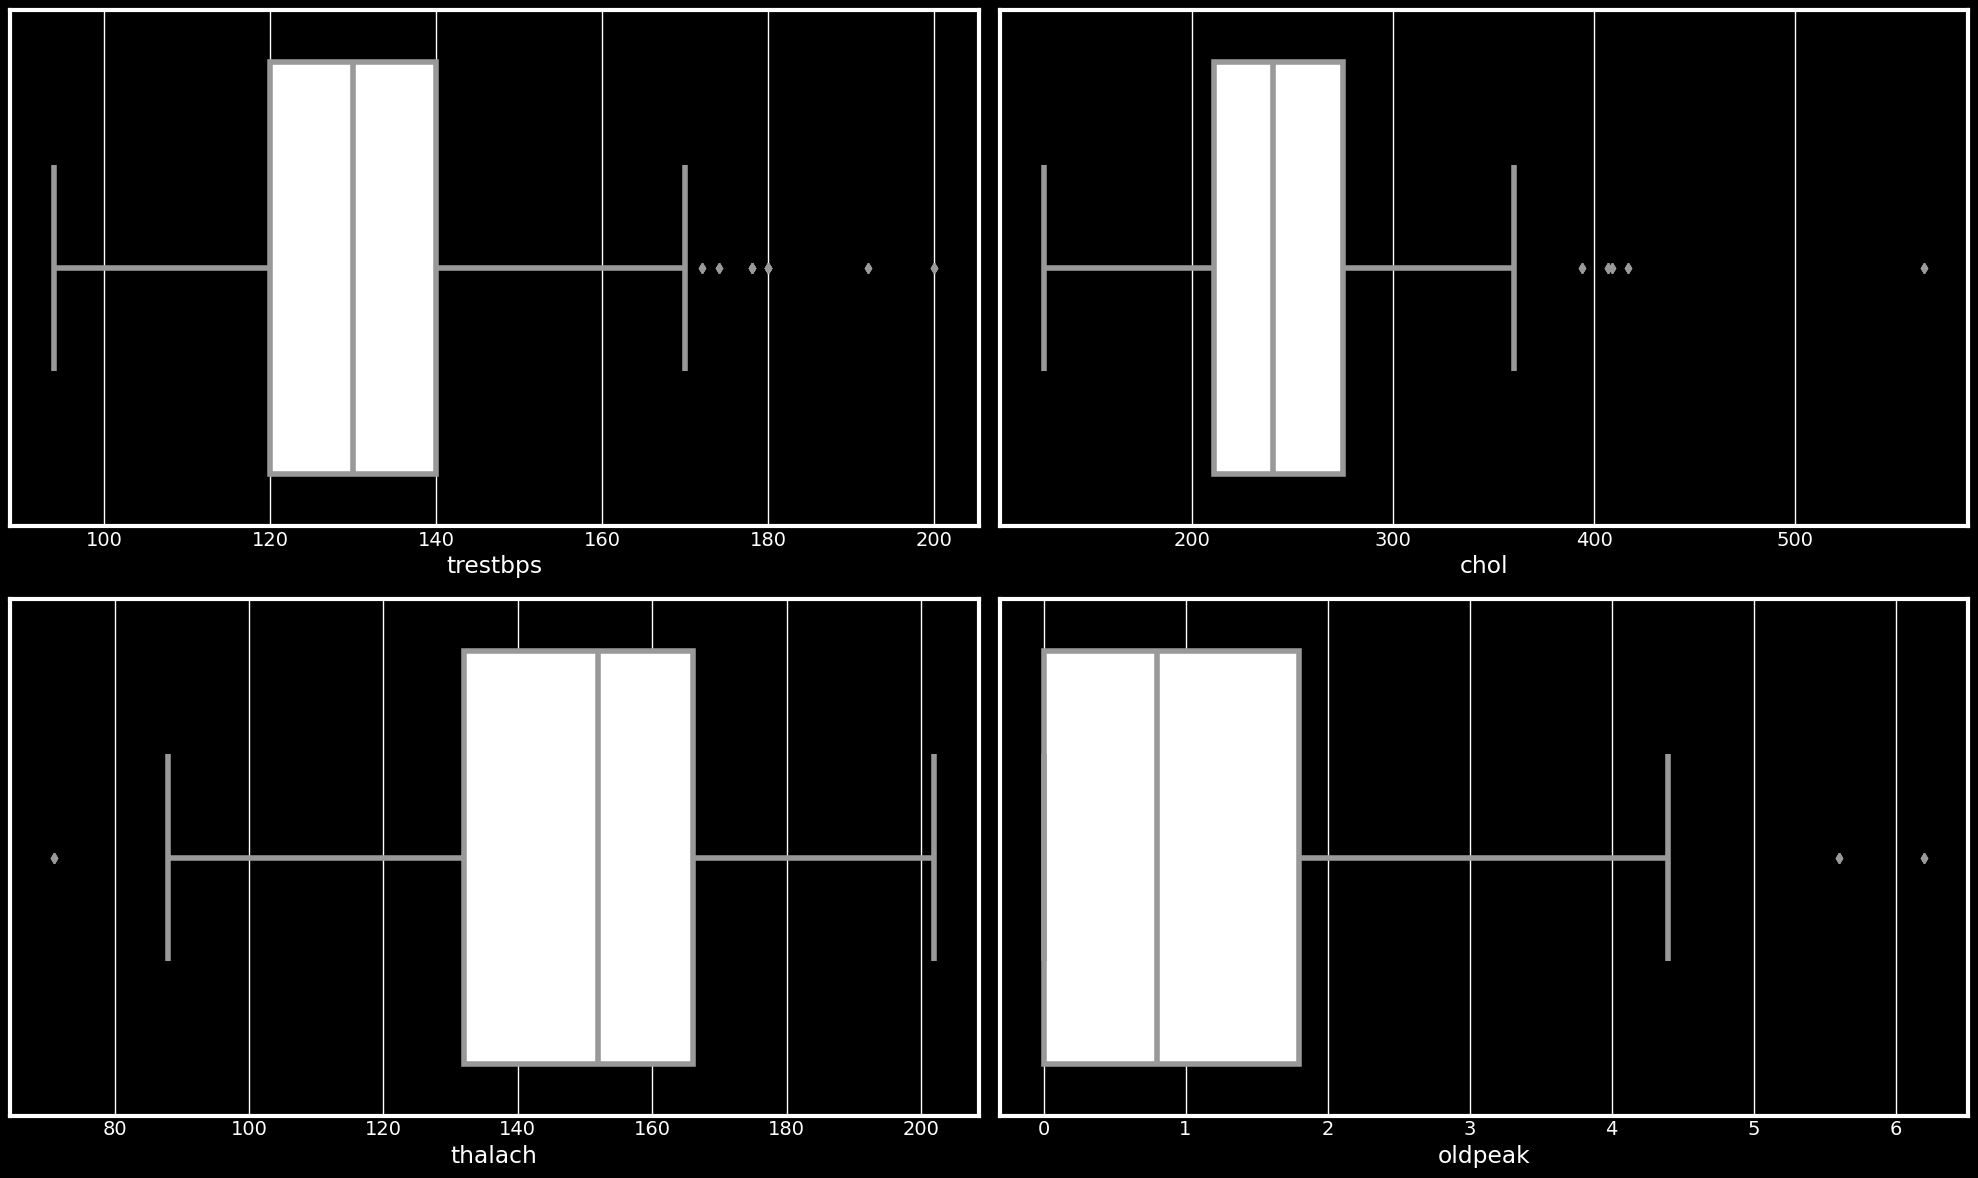

Outliners Present at position: 

trestbps: (array([ 29,  47,  65,  70,  87, 135, 137, 151, 165, 175, 203, 229, 235,
       246, 257, 264, 294, 326, 343, 396, 414, 436, 452, 496, 508, 509,
       528, 539, 609, 612, 624, 636, 679, 681, 688, 798, 819, 837, 862,
       872, 891, 896, 944, 971, 986]),)
chol: (array([123, 158, 179, 192, 255, 450, 464, 481, 542, 578, 641, 665, 685,
       889, 958, 996]),)
thalach: (array([267, 296, 378, 559]),)
oldpeak: (array([   6,   13,   54,   55,   69,  150,  393,  482,  526,  528,  613,
        624,  661,  787,  833,  896, 1013]),)


In [ ]:
fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df,x=df[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

#Display the position of outliners.
print("Outliners Present at position: \n")
print("trestbps: {}".format(np.where(df['trestbps']>165)))
print("chol: {}".format(np.where(df['chol']>360)))
print("thalach: {}".format(np.where(df['thalach']<80)))
print("oldpeak: {}".format(np.where(df['oldpeak']>4)))

In [ ]:
#Data Splitting
X=df.iloc[:,:13]
Y=df["target"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65)

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [ ]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

Execution time of model: 0.06524 seconds



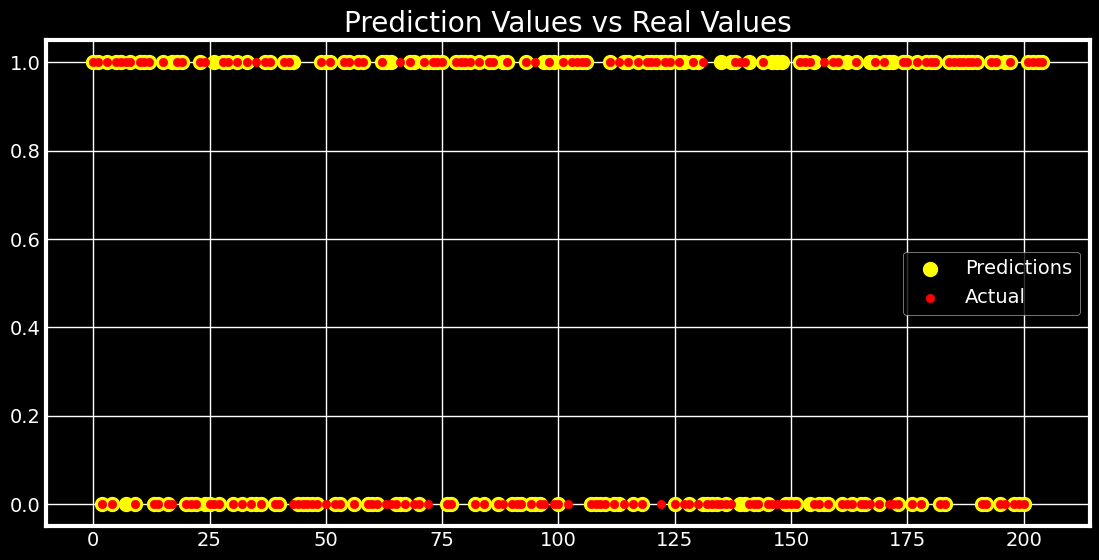

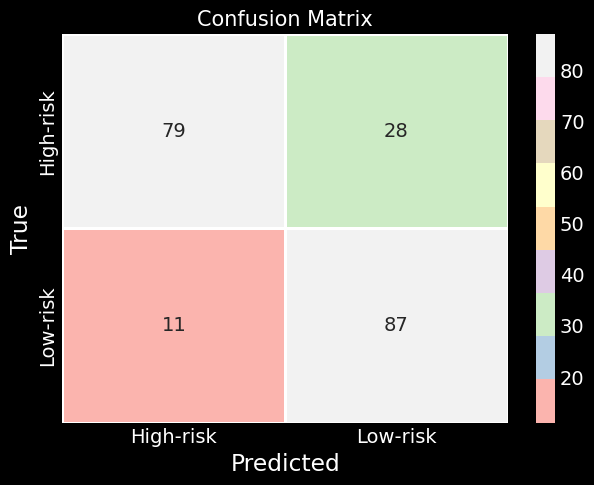

Precision: 0.757 
Recall: 0.888 
F1-Score: 0.817 
Accuracy: 80.976 %
Mean Square Error: 0.19


In [ ]:
#Build Model
start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

Execution time of model: 0.06607 seconds


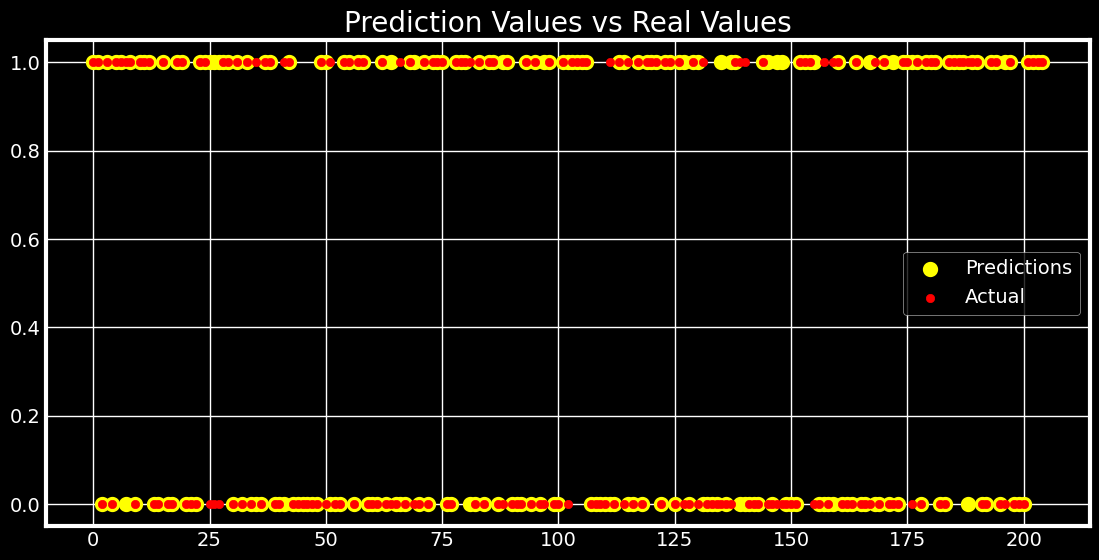

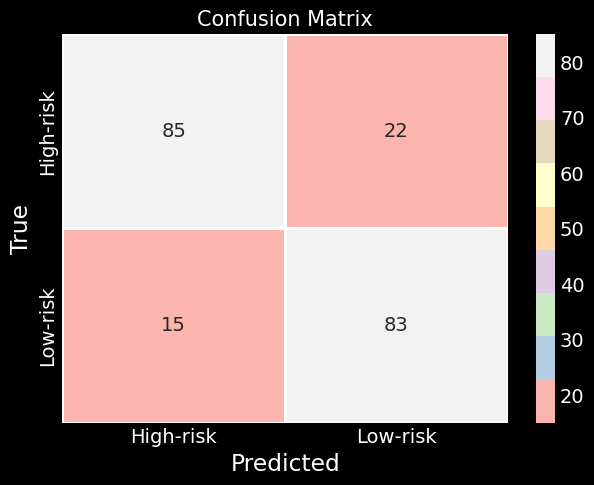

Precision: 0.79 
Recall: 0.847 
F1-Score: 0.818 
Accuracy: 81.951 %
Mean Square Error: 0.18


In [ ]:
#Build Model
start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

Execution time of model: 0.05531 seconds


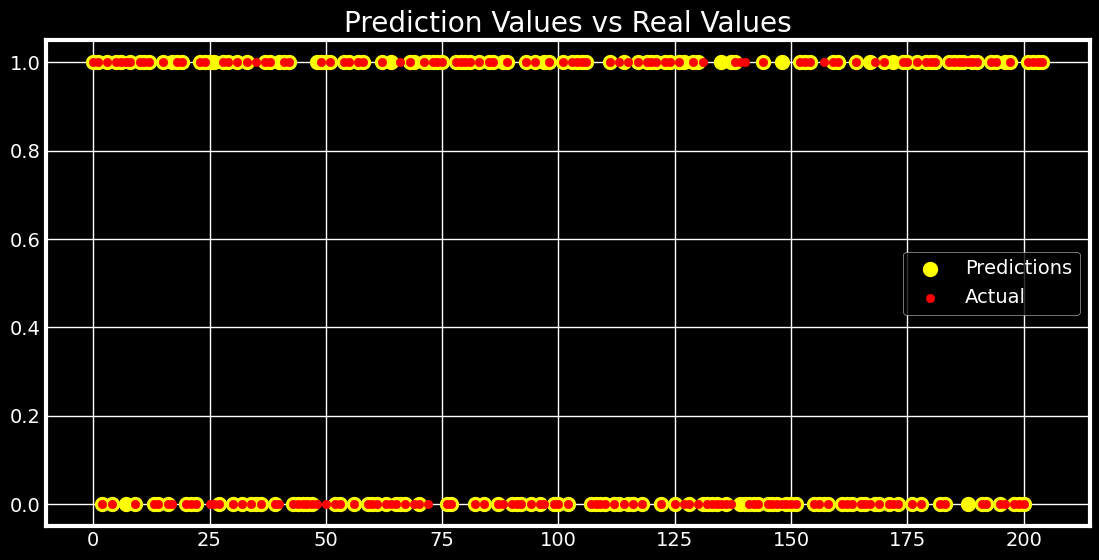

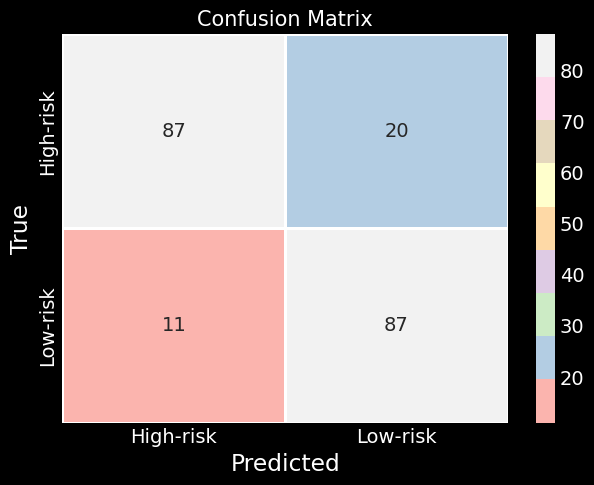

Precision: 0.813 
Recall: 0.888 
F1-Score: 0.849 
Accuracy: 84.878 %
Mean Square Error: 0.151


In [ ]:
#Build Model
start=time.time()

model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

end=time.time()

model_svm_time=end-start
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

Execution time of model: 0.01219 seconds


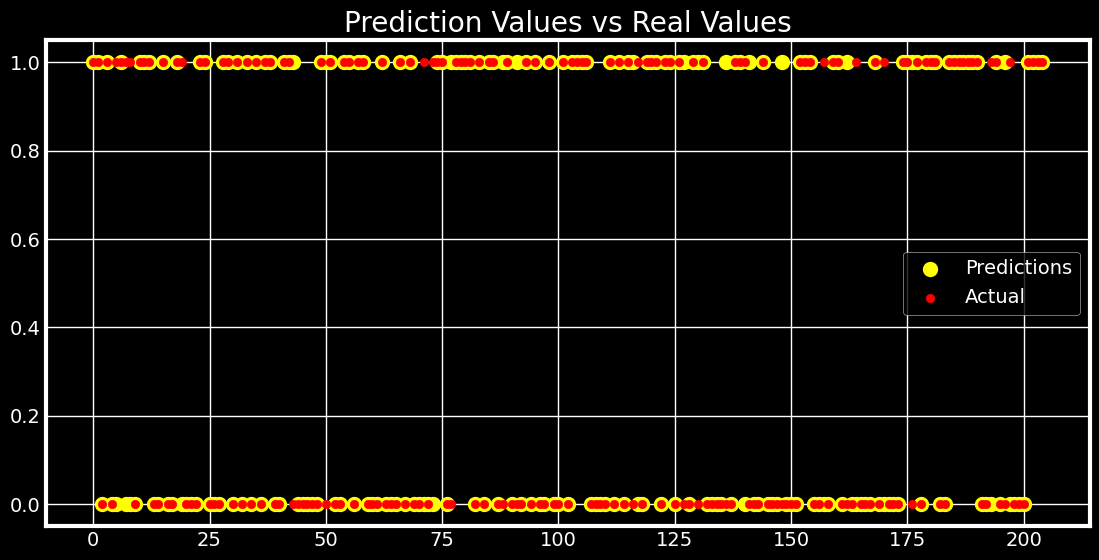

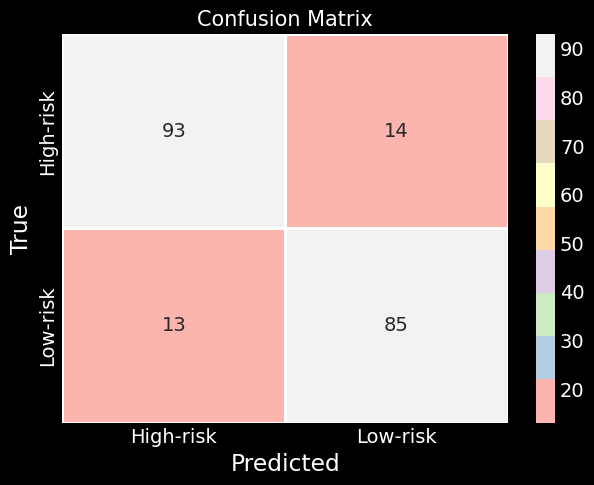

Precision: 0.859 
Recall: 0.867 
F1-Score: 0.863 
Accuracy: 86.829 %
Mean Square Error: 0.132


In [ ]:
#Build Model
start=time.time()

model_tree=DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=100)
model_tree.fit(X_train,Y_train)
Y_pred=model_tree.predict(X_test)

end=time.time()

model_tree_time=end-start
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_tree_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

Execution time of model: 0.73646 seconds


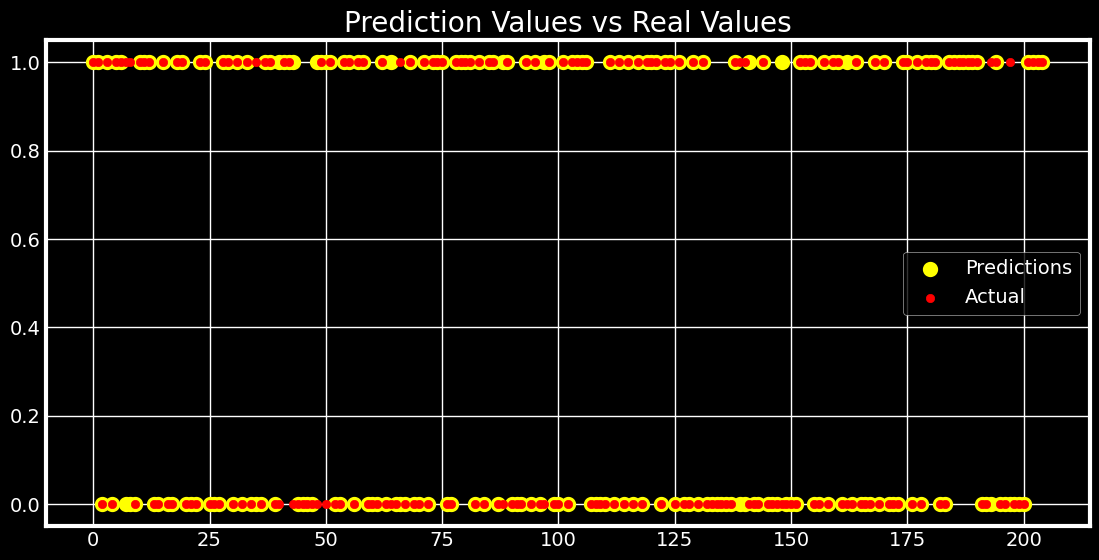

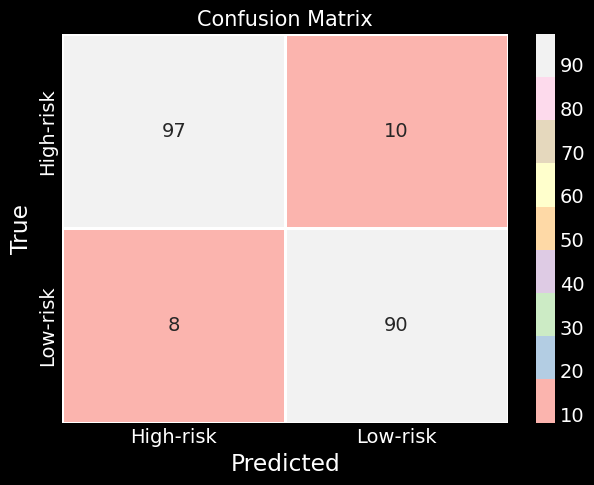

Precision: 0.9 
Recall: 0.918 
F1-Score: 0.909 
Accuracy: 91.22 %
Mean Square Error: 0.088


In [ ]:
#Build Model
start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)
Y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

Execution time of model: 0.20557 seconds


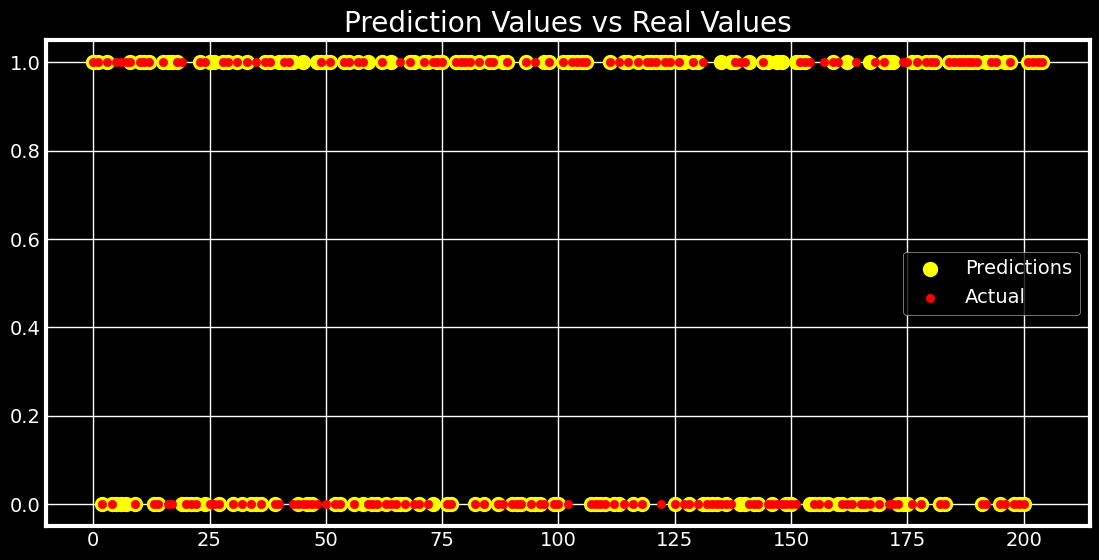

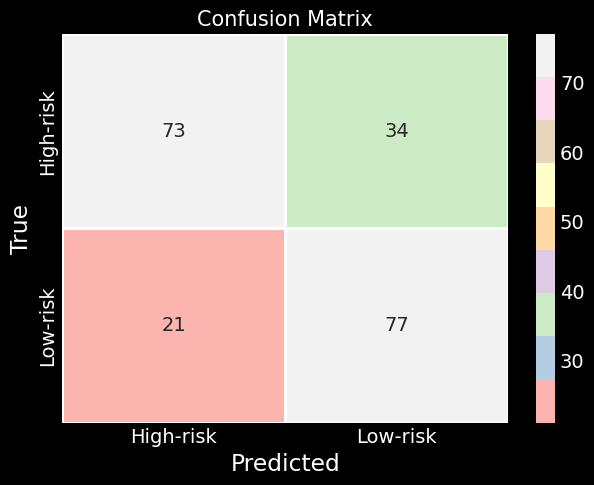

Precision: 0.694 
Recall: 0.786 
F1-Score: 0.737 
Accuracy: 73.171 %
Mean Square Error: 0.268


In [ ]:
#Build Model
start=time.time()

model_ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 25)
model_ADA.fit(X_train,Y_train)
Y_pred= model_ADA.predict(X_test)

end=time.time()

model_ADA_time=end-start
model_ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_ADA_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



Execution time of model: 0.04285 seconds


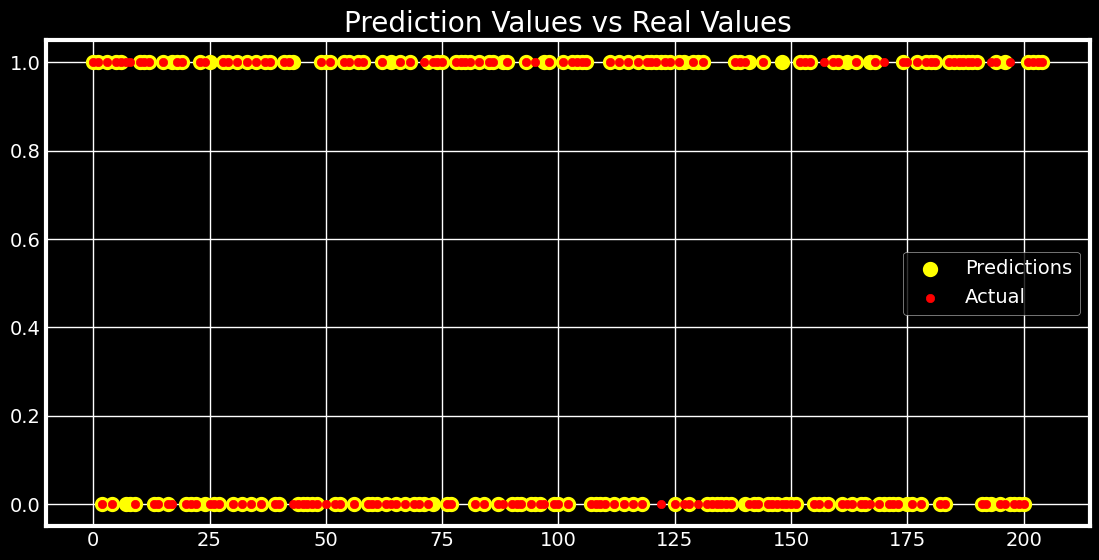

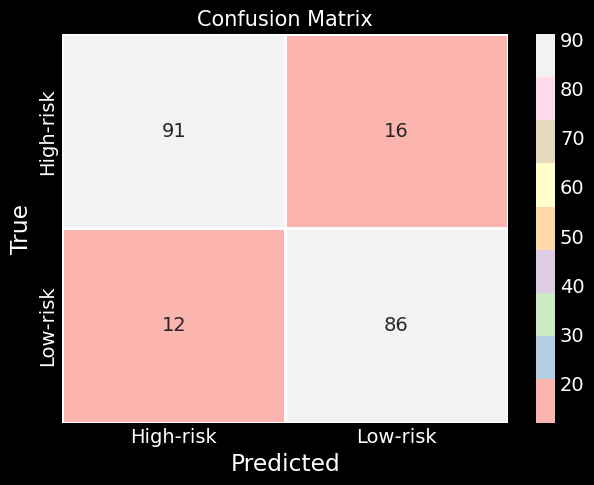

Precision: 0.843 
Recall: 0.878 
F1-Score: 0.86 
Accuracy: 86.341 %
Mean Square Error: 0.137


In [ ]:
#Build Model
start=time.time()

model_GB= GradientBoostingClassifier(random_state=10,n_estimators=20,learning_rate=0.29,loss="deviance")
model_GB.fit(X_train,Y_train)
Y_pred= model_GB.predict(X_test)

end=time.time()

model_GB_time=end-start
model_GB_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_GB_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

Execution time of model: 0.34875 seconds


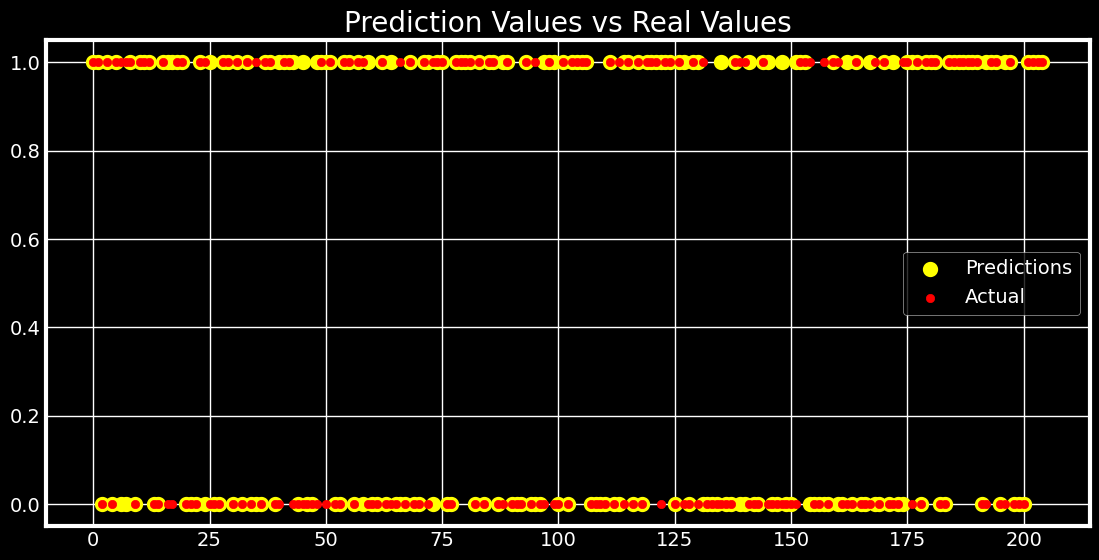

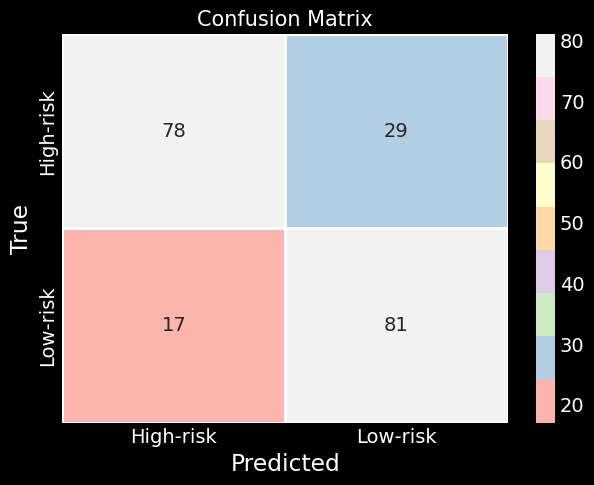

Precision: 0.736 
Recall: 0.827 
F1-Score: 0.779 
Accuracy: 77.561 %
Mean Square Error: 0.224


In [ ]:
#Build Model
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=1,
                          n_estimators = 50,
                          colsample_bytree = 0.5)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)

end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.



Execution time of model: 2.79734 seconds


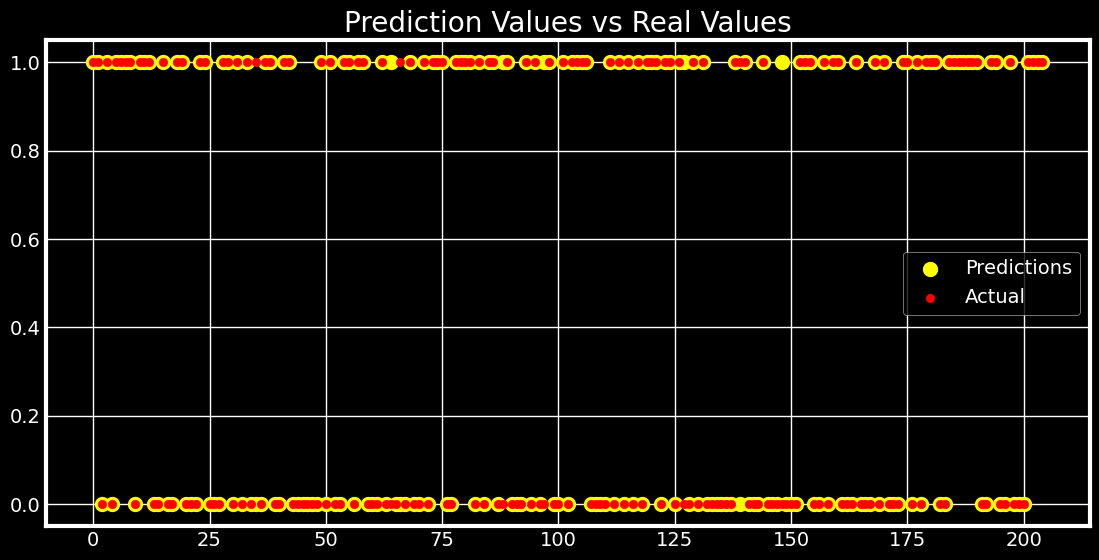

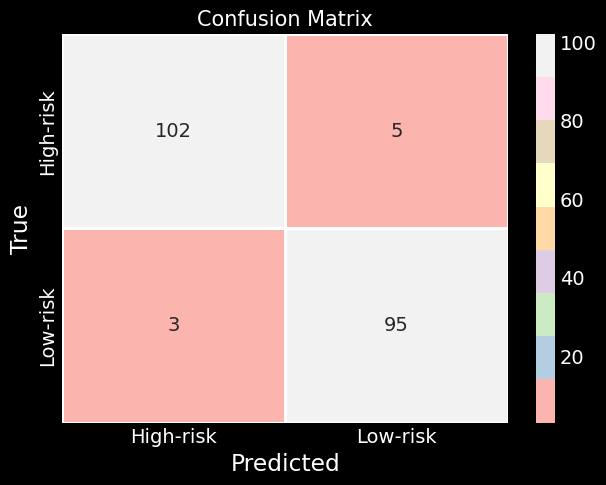

Precision: 0.95 
Recall: 0.969 
F1-Score: 0.96 
Accuracy: 96.098 %
Mean Square Error: 0.039


In [ ]:
#Build Model
start=time.time()

model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=150,activation = 'relu',solver='adam')
model_MLP.fit(X_train, Y_train)
Y_pred=model_MLP.predict(X_test)

end=time.time()

model_MLP_time=end-start
model_MLP_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_MLP_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.



RMSE is lowest at 0.2 for n: [75] 


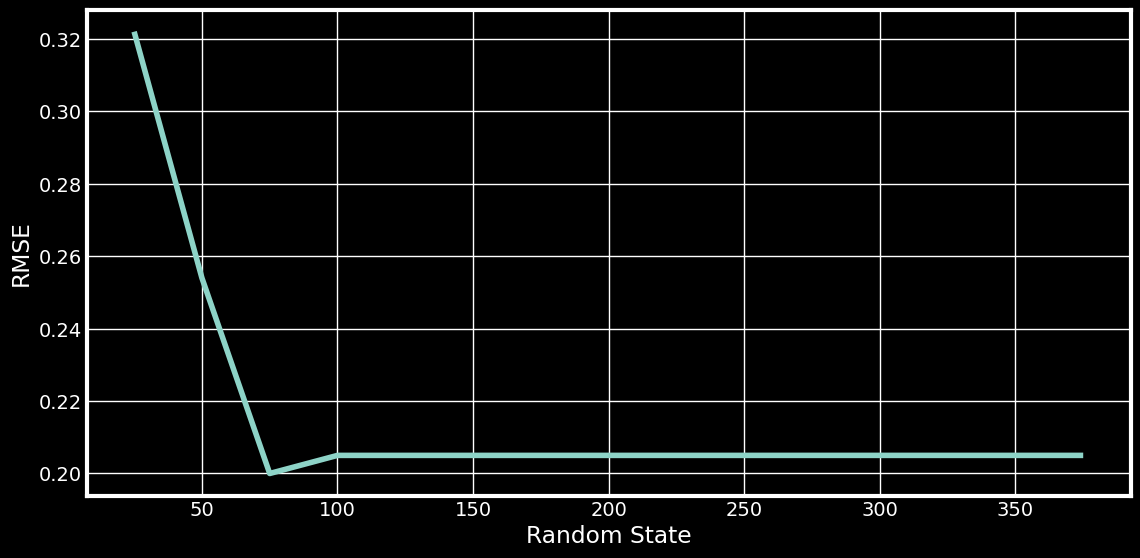

Accuracy is highest at 80.0 % for n: [75] 


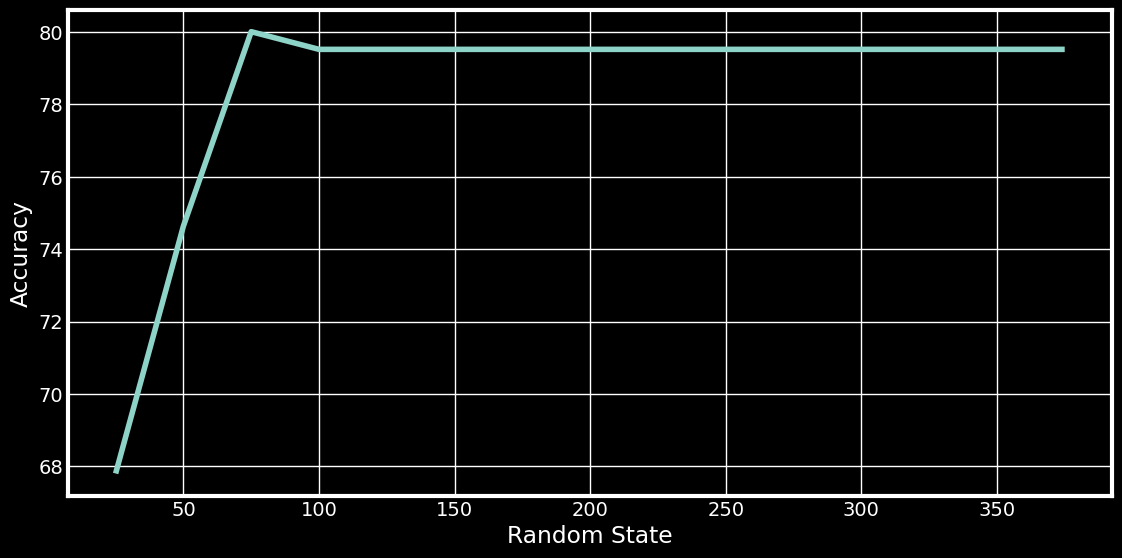

In [ ]:
def checkRS():

    mse_dict={}  #Root mean square dictionary
    acc_dict={}  #Accuracy dictionary

    for n in range(25,400,25):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=65)
        model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=n,activation = 'relu',solver='adam')
        model_MLP.fit(X_train, Y_train)
        Y_pred=model_MLP.predict(X_test)
        acc=accuracy_score(Y_test,Y_pred)
        mse=mean_squared_error(Y_test,Y_pred)
        mse_dict.update({n:round(mse,3)})
        acc_dict.update({n:round((acc*100),3)})

    #Mean Square Error
    lowest=min(mse_dict.values())
    res = [key for key in mse_dict if mse_dict[key] == lowest]
    mse_list=mse_dict.items()
    k,v = zip(*mse_list)
    print("RMSE is lowest at {} for n: {} ".format(round((lowest),3),res))

    #Plot RMSE values
    plt.figure(figsize=(12,6))
    #plt.scatter(res,lowest,color="red",lw=5)
    plt.plot(k,v)
    plt.xlabel("Random State")
    plt.ylabel("RMSE")
    plt.grid(True)
    plt.show()

    #Accuracy
    highest=max(acc_dict.values())
    res1= [key for key in acc_dict if acc_dict[key] == highest]
    acc_list=acc_dict.items()
    k1,v1=zip(*acc_list)
    print("Accuracy is highest at {} % for n: {} ".format(highest,res1))
    #Plot Accuracy values
    plt.figure(figsize=(12,6))
    #plt.scatter(res1,highest,color="red",lw=5)
    plt.plot(k1,v1)
    plt.xlabel("Random State")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

checkRS()

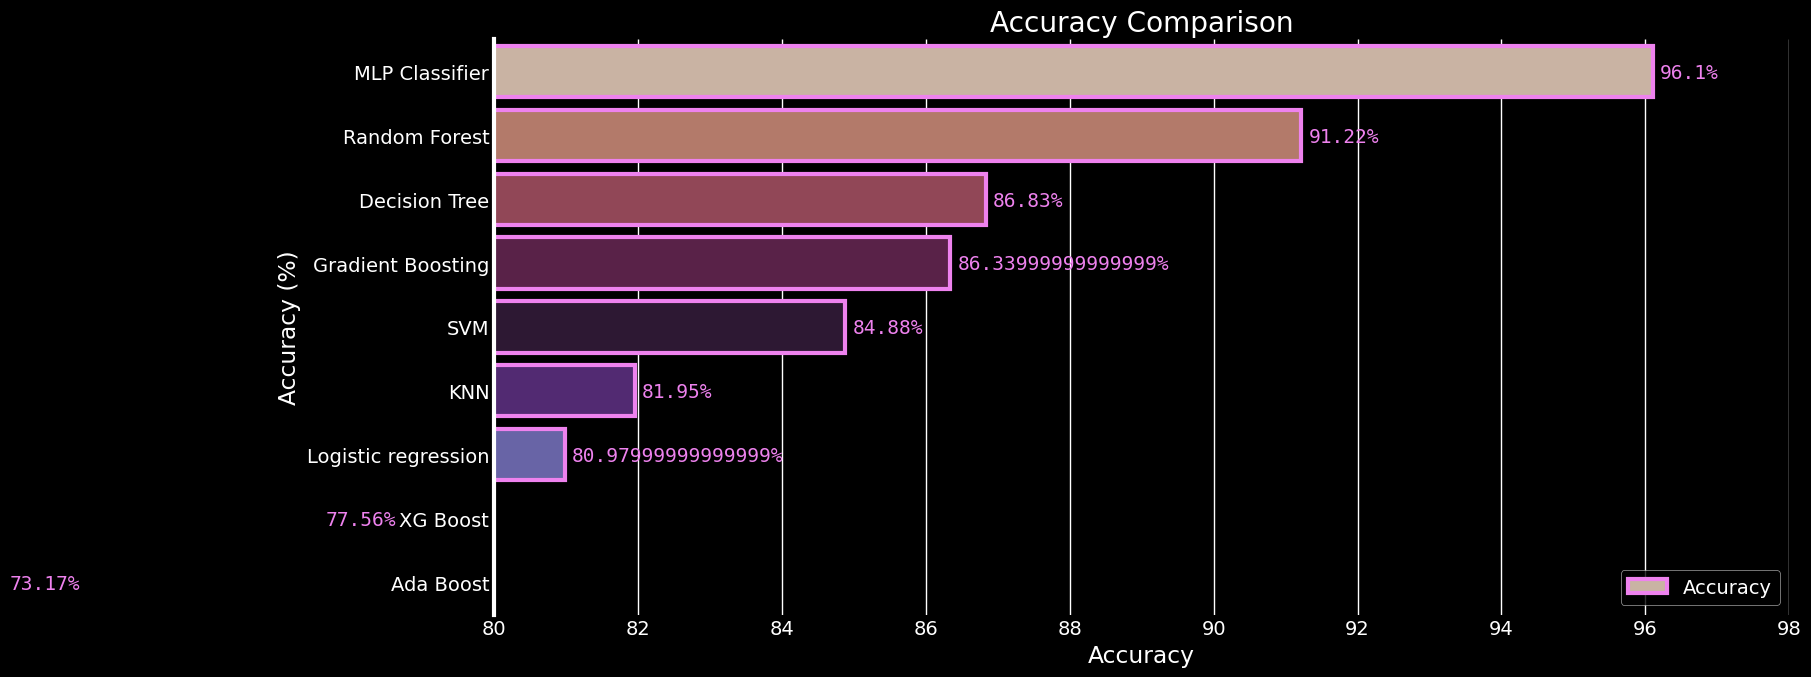

In [ ]:
accuracies={"Logistic regression": model_Log_accuracy,
            "KNN": model_KNN_accuracy,
            "SVM": model_svm_accuracy,
            "Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
            "Ada Boost": model_ADA_accuracy,
            "Gradient Boosting": model_GB_accuracy,
            "XG Boost": model_xgb_accuracy,
            "MLP Classifier": model_MLP_accuracy}

acc_list=accuracies.items()
k,v = zip(*acc_list)
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(80,98)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)

#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'violet')
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()